<a href="https://colab.research.google.com/github/Jimmy-Rais/Machine-Learning/blob/main/Housing_Price_pred.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import pandas as pd
import io
from google.colab import files

In [3]:
#Load the dataset
uploaded=files.upload()

Saving housing.csv to housing.csv


In [4]:
df=pd.read_csv(io.BytesIO(uploaded['housing.csv']))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

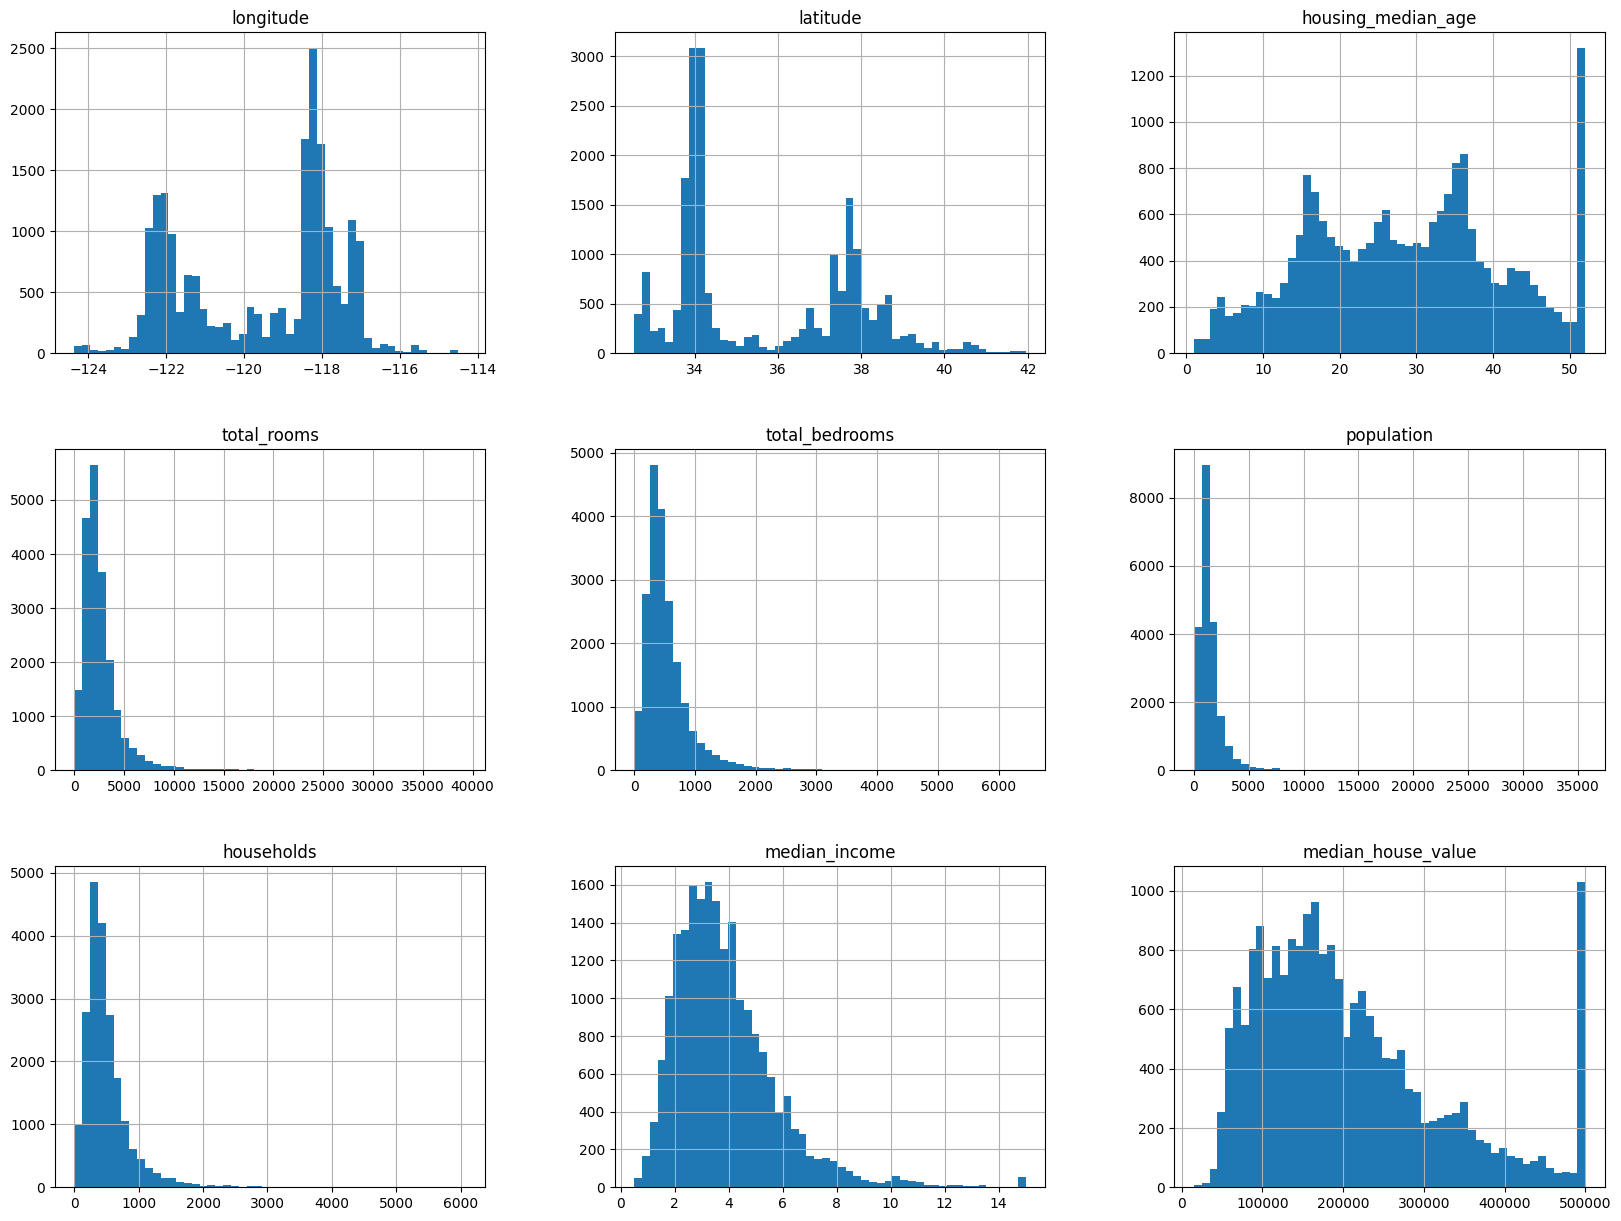

In [5]:
# Understand the dataset
df.head()
df.info()# Data types of all the features and targets
df.describe() #Stats of numerical features
df['ocean_proximity'].value_counts()
df.hist(bins=50,figsize=(20,15)) #Bell shaped curves are preferable

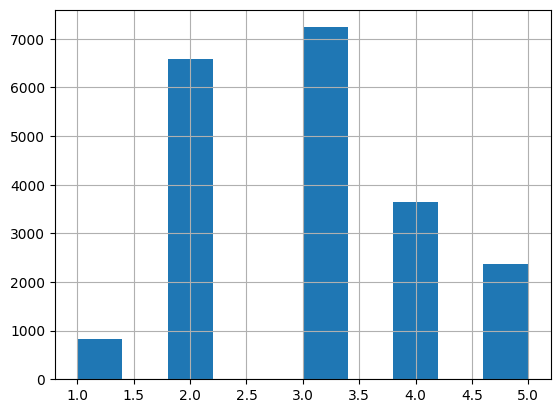

In [6]:
# Data spliting
from sklearn.model_selection import StratifiedShuffleSplit
#Create Representative startas
df['income_cat']=pd.cut(df["median_income"],
                        bins=[0,1.5,3.0,4.5,6,np.inf],
                        labels=[1,2,3,4,5]
                        )
df["income_cat"].hist()
#Stratified sampling
split=StratifiedShuffleSplit(n_splits=1,test_size=0.2,random_state=40)
for train_index,test_index in split.split(df,df['income_cat']):
  strat_train_set=df.loc[train_index]
  strat_test_set=df.loc[test_index]
#INCOME CATEGORY IN TEST SET
strat_test_set['income_cat'].value_counts()
len(strat_test_set)
#Remove the income Category
for set_ in (strat_train_set,strat_test_set):
  set_.drop("income_cat",axis=1,inplace=True)

<Axes: xlabel='longitude', ylabel='latitude'>

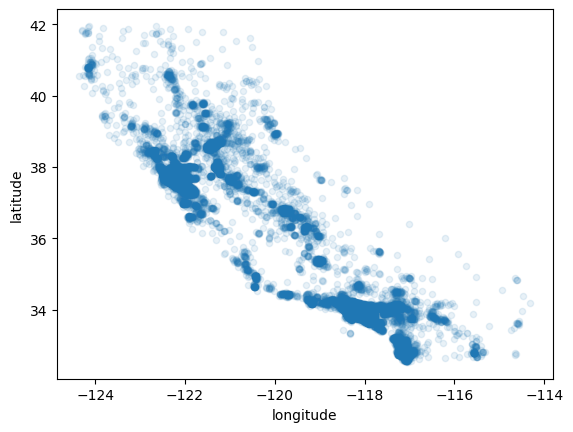

In [7]:
#Data visualization
df=strat_train_set.copy()
#Latitude vs Longitude
df.plot(kind='scatter',x='longitude',y='latitude',alpha=0.1)

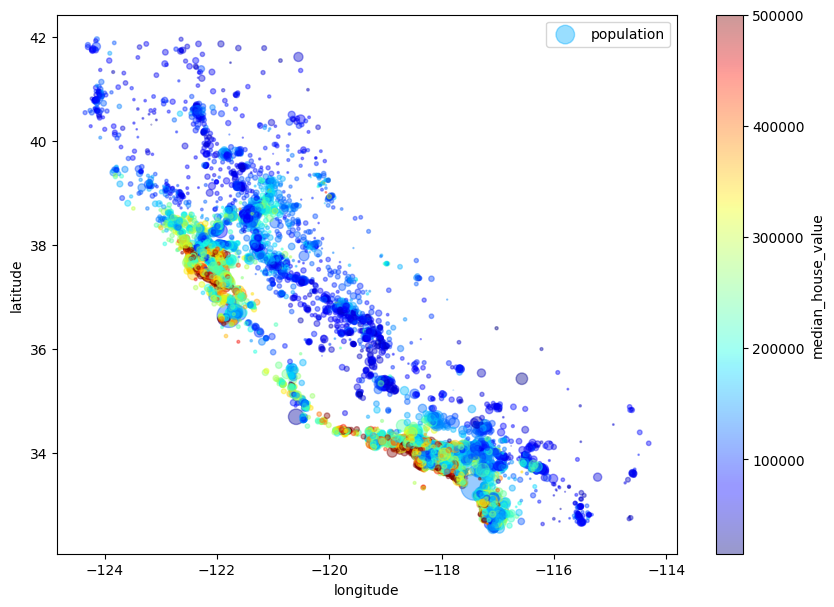

In [8]:
#Housing prices
df.plot(kind='scatter',x="longitude",y="latitude",alpha=0.4,s=df["population"]/100,label='population',figsize=(10,7),
        c="median_house_value",cmap=plt.get_cmap('jet'),colorbar=True),
plt.legend()

array([[<Axes: xlabel='median_house_value', ylabel='median_house_value'>,
        <Axes: xlabel='median_income', ylabel='median_house_value'>,
        <Axes: xlabel='total_rooms', ylabel='median_house_value'>,
        <Axes: xlabel='housing_median_age', ylabel='median_house_value'>],
       [<Axes: xlabel='median_house_value', ylabel='median_income'>,
        <Axes: xlabel='median_income', ylabel='median_income'>,
        <Axes: xlabel='total_rooms', ylabel='median_income'>,
        <Axes: xlabel='housing_median_age', ylabel='median_income'>],
       [<Axes: xlabel='median_house_value', ylabel='total_rooms'>,
        <Axes: xlabel='median_income', ylabel='total_rooms'>,
        <Axes: xlabel='total_rooms', ylabel='total_rooms'>,
        <Axes: xlabel='housing_median_age', ylabel='total_rooms'>],
       [<Axes: xlabel='median_house_value', ylabel='housing_median_age'>,
        <Axes: xlabel='median_income', ylabel='housing_median_age'>,
        <Axes: xlabel='total_rooms', ylabel='housi

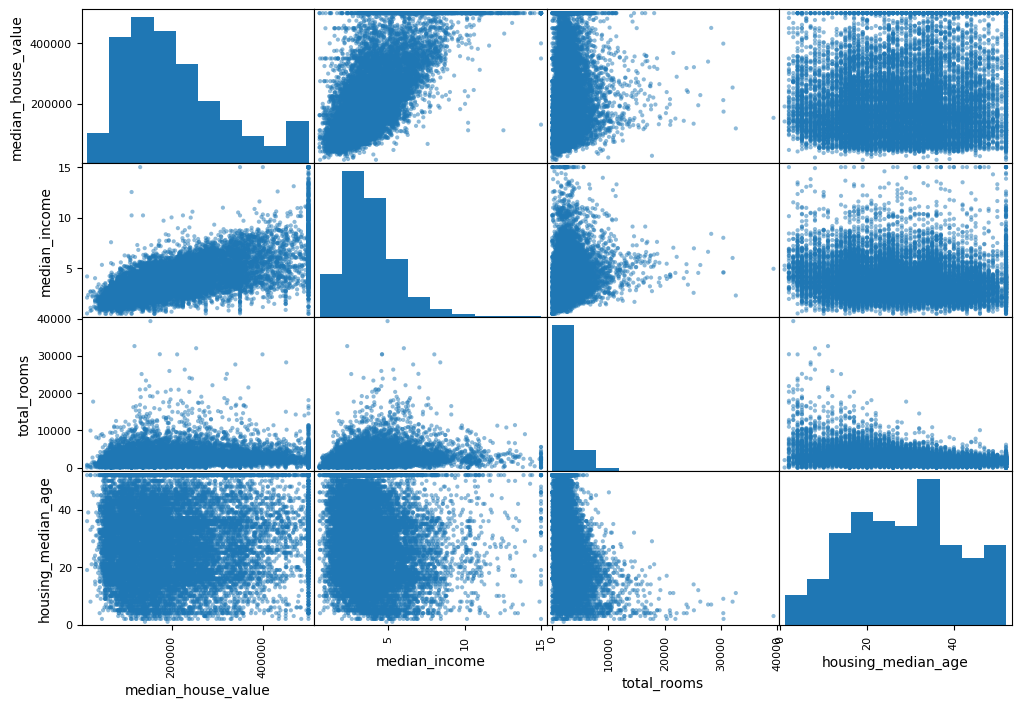

In [9]:
#Scatter matrix
from pandas.plotting import scatter_matrix
attributes=['median_house_value','median_income','total_rooms','housing_median_age']
scatter_matrix(df[attributes],figsize=(12,8))

In [10]:
#Correlation
corr_matrix=df.corr()
corr_matrix['median_house_value'].sort_values(ascending=False)


<ipython-input-10-060bf9b5c569>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix=df.corr()


median_house_value    1.000000
median_income         0.686865
total_rooms           0.138007
housing_median_age    0.105329
households            0.070014
total_bedrooms        0.052814
population           -0.021544
longitude            -0.051167
latitude             -0.137691
Name: median_house_value, dtype: float64

<Axes: xlabel='median_income', ylabel='median_house_value'>

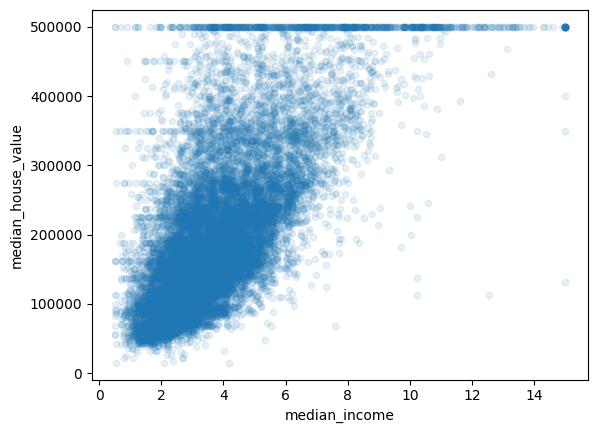

In [11]:
#Most relevant feature
df.plot(kind='scatter',x='median_income',y='median_house_value',alpha=0.1)

In [12]:
#New attributes
df['rooms_per_household']=df['total_rooms']/df['households']
df['bedrooms_per_rooms']=df['total_bedrooms']/df['total_rooms']
df['population_per_household']=df['population']/df['households']
 #Correlation matrix
corr_matrix=df.corr()
corr_matrix['median_house_value'].sort_values(ascending=False)

<ipython-input-12-5ad6debbcfdd>:6: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix=df.corr()


median_house_value          1.000000
median_income               0.686865
rooms_per_household         0.159500
total_rooms                 0.138007
housing_median_age          0.105329
households                  0.070014
total_bedrooms              0.052814
population                 -0.021544
population_per_household   -0.027110
longitude                  -0.051167
latitude                   -0.137691
bedrooms_per_rooms         -0.255178
Name: median_house_value, dtype: float64

In [13]:
#Data preparation
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
data_pipeline=Pipeline([
    ('imputer',SimpleImputer(strategy='median')),
    ('std_scaler',StandardScaler())
])

In [15]:
#Model Training
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
polynomial_regression_1=Pipeline([
    ("poly_features",PolynomialFeatures(degree=2,include_bias=False)),
    ("lin_reg",LinearRegression()),
])
polynomial_regression_2=Pipeline([
    ("poly_features",PolynomialFeatures(degree=2,include_bias=False)),
    ("lin_reg",LinearRegression()),
])
polynomial_regression_3=Pipeline([
    ("poly_features",PolynomialFeatures(degree=2,include_bias=False)),
    ("lin_reg",LinearRegression()),
])
#Grid Search cv to select the model with the best parameters
#Lasso,Ridge and